**Tarea 8 Analisis y prediccion de audio**

JOSE ALBERTO LOPEZ ALVAREZ
MAT.1553133

In [1]:
import librosa

/usr/local/lib/python3.7/dist-packages/resampy/interpn.py:114: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  _resample_loop_p(x, t_out, interp_win, interp_delta, num_table, scale, y)


In [2]:
audio_data = '/content/blues.00001.wav'
x , sr = librosa.load(audio_data)
print(type(x), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [3]:
librosa.load(audio_data, sr=44100)

(array([ 0.00339674,  0.00466825,  0.00432115, ..., -0.18951336,
        -0.14747359, -0.06919175], dtype=float32), 44100)

En la siguiente funcion podemos reproducir el audio para entenderlo y como objeto de visualizacion

In [4]:
import IPython.display as ipd
ipd.Audio(audio_data)

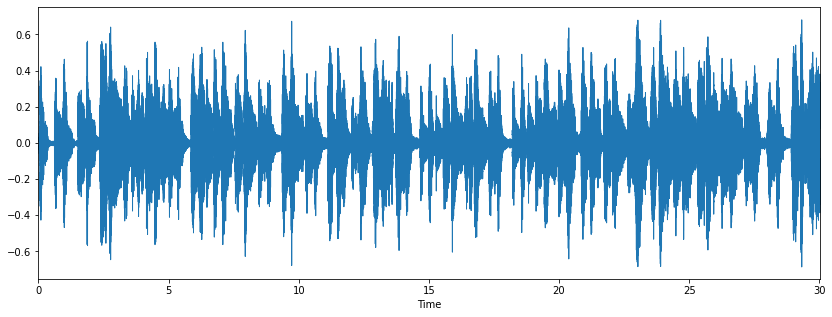

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

Espectograma: es una forma de representar visualmente el volumen de cierta señal a lo largo del tiempo en varias frecuencias

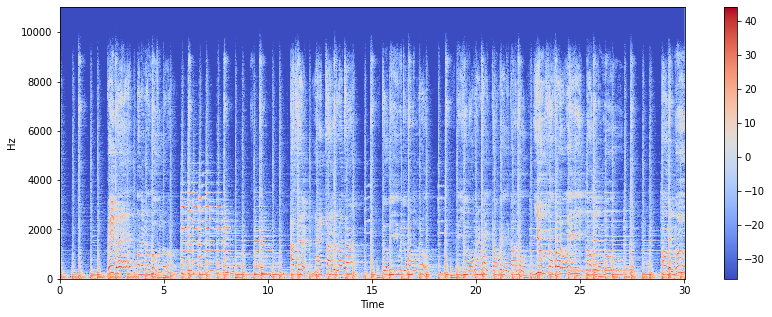

In [6]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

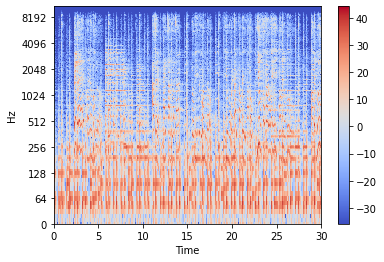

In [7]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

Extraccion de caracterisiticas principales: Las características espectrales (características basadas en la frecuencia), que se obtienen al convertir la señal basada en el tiempo en el dominio de la frecuencia utilizando la Transformada de Fourier.
- la frecuencia fundamental
- los componentes de la frecuencia
- el centroide espectral
- el flujo espectral
- la densidad espectral
- la caída espectral

Centroide Espectral: El centroide espectral indica en qué frecuencia se centra la energía de un espectro o, en otras palabras, indica dónde se encuentra el "centro de masa" de un sonido.

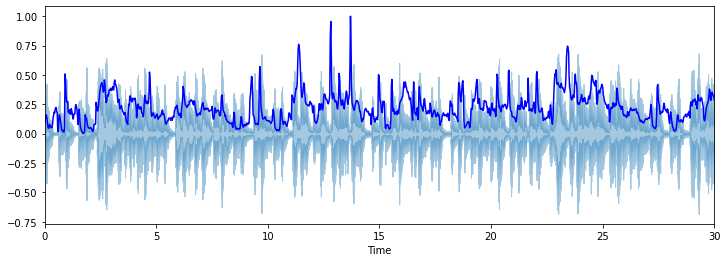

In [8]:
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
(775,)
# Computing the time variable for visualization
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

Rolloff espectral: Es una medida de la forma de la señal. Representa la frecuencia a la que las frecuencias altas descienden a 0. Para obtenerlo, tenemos que calcular la fracción de bins en el espectro de potencia donde el 85% de su potencia está en las frecuencias más bajas.

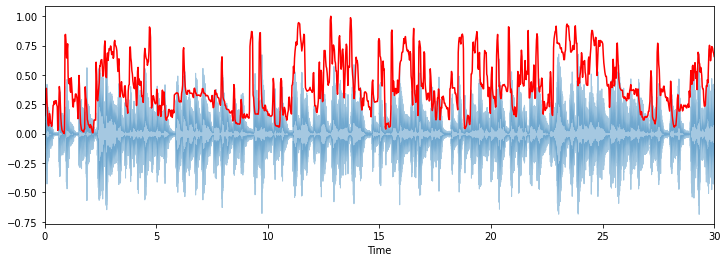

In [9]:
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
plt.figure(figsize=(12, 4))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

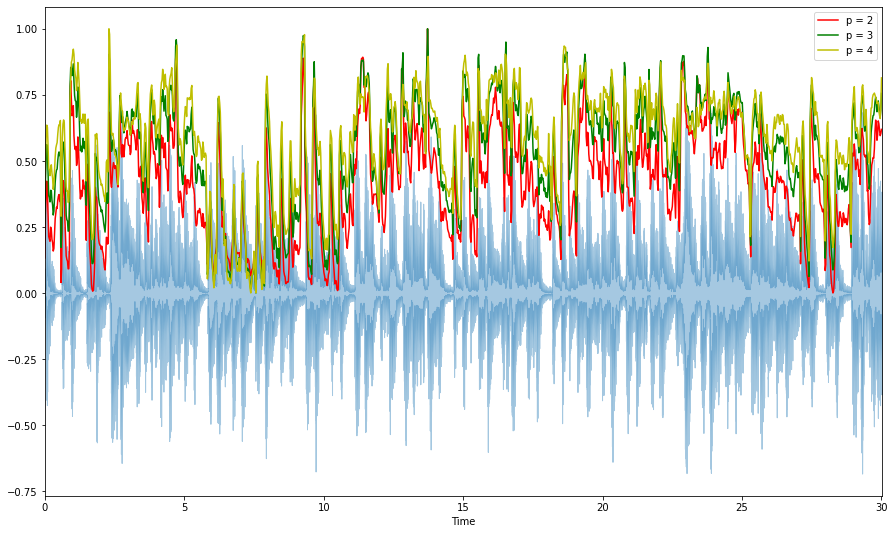

In [10]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=4)[0]
plt.figure(figsize=(15, 9))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

In [11]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

import keras
from keras import layers
from keras import layers
import keras
from keras.models import Sequential
import warnings
warnings.filterwarnings('ignore')

In [12]:
cmap = plt.get_cmap('inferno')
plt.figure(figsize=(8,8))
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    pathlib.Path(f'img_data/{g}').mkdir(parents=True, exist_ok=True)
    for filename in os.listdir(f'/content/drive/MyDrive/genres_original/{g}'):
        songname = f'/content/drive/MyDrive/genres_original/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=5)
        plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
        plt.axis('off');
        plt.savefig(f'img_data/{g}/{filename[:-3].replace(".", "")}.png')
        plt.clf()

NoBackendError: ignored

<Figure size 576x576 with 0 Axes>

In [13]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [14]:
file = open('dataset.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    for filename in os.listdir(f'/content/drive/MyDrive/genres_original/{g}'):
        songname = f'/content/drive/MyDrive/genres_original/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)
        rmse = librosa.feature.rms(y=y)[0]
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('dataset.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

NoBackendError: ignored

In [15]:
data = pd.read_csv('/content/drive/MyDrive/features_30_sec.csv')
data.head()# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)#Encoding the Labels
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)#Scaling the Feature columns
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))#Dividing data into training and Testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [54]:
model = Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adamax',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [55]:
classifier = model.fit(X_train,
                    y_train,
                    epochs=50,
                    batch_size=32)

Epoch 1/50
25/25 [==============================] - 0s 2ms/step - loss: 1.9426 - accuracy: 0.3550
Epoch 2/50
25/25 [==============================] - 0s 2ms/step - loss: 1.4795 - accuracy: 0.5325
Epoch 3/50
25/25 [==============================] - 0s 2ms/step - loss: 1.2094 - accuracy: 0.6000
Epoch 4/50
25/25 [==============================] - 0s 3ms/step - loss: 1.0367 - accuracy: 0.6775
Epoch 5/50
25/25 [==============================] - 0s 3ms/step - loss: 0.9268 - accuracy: 0.7025
Epoch 6/50
25/25 [==============================] - 0s 2ms/step - loss: 0.8301 - accuracy: 0.7462
Epoch 7/50
25/25 [==============================] - 0s 3ms/step - loss: 0.7592 - accuracy: 0.7675
Epoch 8/50
25/25 [==============================] - 0s 2ms/step - loss: 0.7014 - accuracy: 0.7825
Epoch 9/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6436 - accuracy: 0.8050
Epoch 10/50
25/25 [==============================] - 0s 2ms/step - loss: 0.5920 - accuracy: 0.8200
Epoch 11/50
25/25 [

In [56]:
y_pred = model.predict(X_test).argmax(1)
y_true = y_test

In [34]:
import seaborn as sns
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report

In [35]:
classes = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

Text(0.5, 15.0, 'Prediccion')

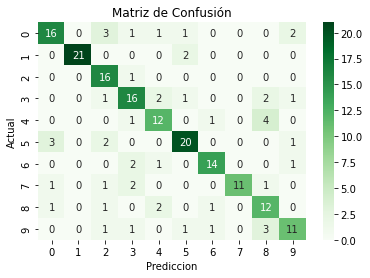

In [57]:
confusion_matrix(y_pred=y_pred,y_true=y_true)
p = sns.heatmap(pd.DataFrame(confusion_matrix(y_pred=y_pred,y_true=y_true)), annot=True, cmap="Greens" ,fmt='g')
plt.title('Matriz de Confusión', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Prediccion')

In [58]:
print('Model: \n',classification_report(y_true=y_true,y_pred=y_pred,target_names=classes))

Model: 
               precision    recall  f1-score   support

       blues       0.76      0.67      0.71        24
   classical       1.00      0.91      0.95        23
     country       0.64      0.94      0.76        17
       disco       0.67      0.70      0.68        23
      hiphop       0.67      0.67      0.67        18
        jazz       0.80      0.77      0.78        26
       metal       0.82      0.78      0.80        18
         pop       1.00      0.69      0.81        16
      reggae       0.55      0.71      0.62        17
        rock       0.69      0.61      0.65        18

    accuracy                           0.74       200
   macro avg       0.76      0.74      0.74       200
weighted avg       0.76      0.74      0.75       200



Conclusión: El accuracy es bueno, las clases que más dificultades tiene para predecir es el reggae y el rock, las cuales tiene algunas confusiones con el disco. 
Realice pruebas con optimizador SGD y adamax y mejoro mucho en unas clases, pero empeoro otras, al final la mejor opción fue cambiar adam por adamax. también modifique la función de activación por sigmoid pero definitivamente la mejor fue softmax